In [2]:
import requests
import json
import matplotlib.pyplot as plt
import os
import pandas as pd
from datetime import datetime
from pandasql import sqldf
import statistics

In [3]:
"""Get all data from binance leaderboard by time perdiods"""

periods = ['DAILY', 'WEEKLY', 'MONTHLY', 'ALL']
statisticsTypes = ['ROI', 'PNL']
for period in periods:
    for statisticsType in statisticsTypes:
        query = {"isShared": True, "periodType": period, "statisticsType": statisticsType, "tradeType": "PERPETUAL"}
        url = 'https://www.binance.com/bapi/futures/v2/public/future/leaderboard/getLeaderboardRank'
        x = requests.post(url, json=query)

        res = x.content.decode('utf-8')
        f = open(f"data/{statisticsType}/{period}.json", "w")
        f.write(res)
        f.close()

In [4]:
"""Get UIDs from datafile, see if trader appears in futuresheroes and add data to file"""

period = 'Monthly'
type = 'PNL'

f = open(f'data/{type}/{period}.json')
data = json.load(f)
for d in data['data']:
    uid = (d['encryptedUid'])
    response = requests.get(f"https://backend.copyfuture.me/binance/leaderboard/get-user-positions?encUserId={uid}")
    data = response.content.decode('utf-8')
    if not os.path.exists(f"traders/{period}"):
        os.makedirs(f"traders/{period}")
    with open(f"traders/{period}/{uid}.json", "w") as f:
        f.write(data)
        f.close()

In [5]:
""" """
rootdir = 'traders'
df = pd.DataFrame(columns=['userId', 'symbol', 'pnl', 'roe', 'createTimeStamp', 'updateTimeStamp', 'amount', 'date',
                           'timeInTrade'])

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        t = os.path.join(subdir, file)
        f = open(t)
        data = json.load(f)

        profits = 0
        graph = []
        for trade in data[::-1]:
            if trade['closed']:
                df2 = pd.DataFrame([
                    {'userId': trade["userId"],
                     'symbol': trade["symbol"],
                     'pnl': trade['pnl'],
                     'roe': trade['roe'],
                     'createTimeStamp': trade['createTimeStamp'] / 1000,
                     'updateTimeStamp': trade['updateTimeStamp'] / 1000,
                     'amount': trade['amount'],
                     'date': datetime.fromtimestamp(trade['updateTimeStamp'] / 1000),
                     'timeInTrade': (trade['updateTimeStamp'] - trade['createTimeStamp']) / 1000
                     }])

                df = pd.concat([df, df2])

df.to_csv('data/all_trades.csv')

In [6]:
df = pd.read_csv("data/all_trades.csv", sep=",")
df.head()

,Unnamed: 0,userId,symbol,pnl,roe,createTimeStamp,updateTimeStamp,amount,date,timeInTrade
0,0,3981DE6572C193CB66D3FB022050B303,ETHUSDT,5112.833078,0.7750,1.655316e+09,1.655319e+09,56.25,2022-06-15 21:44:16.614,2476.309
1,0,3981DE6572C193CB66D3FB022050B303,SOLUSDT,975.405008,0.2291,1.655253e+09,1.655319e+09,1375.00,2022-06-15 21:44:32.881,65443.050
2,0,3981DE6572C193CB66D3FB022050B303,BTCUSDT,1624.282700,0.5995,1.655316e+09,1.655319e+09,2.50,2022-06-15 21:48:15.632,2998.023
3,0,3981DE6572C193CB66D3FB022050B303,LINKUSDT,2607.142650,0.7692,1.655316e+09,1.655319e+09,5000.00,2022-06-15 21:48:15.641,2618.779
4,0,3981DE6572C193CB66D3FB022050B303,UNIUSDT,718.289796,0.2371,1.655318e+09,1.655319e+09,5016.00,2022-06-15 21:48:15.651,1044.142


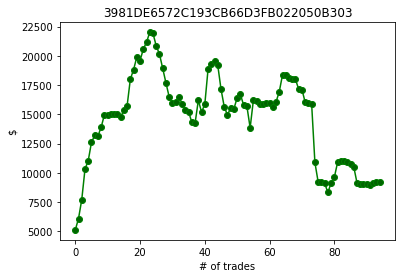

UID: 3981DE6572C193CB66D3FB022050B303
STD: 3815.1641979520127
First recorded trade: 4 days ago
Average profit per trade ($): 97.09467844442108
Max Drawdown 62.216670451964575 %
[13697, 22015, 8318]


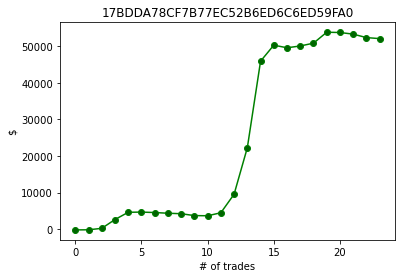

UID: 17BDDA78CF7B77EC52B6ED6C6ED59FA0
STD: 23788.042765366048
First recorded trade: 113 days ago
Average profit per trade ($): 2172.5499897079167
Max Drawdown 3.2420294696210514 %
[1747, 53886, 52139]


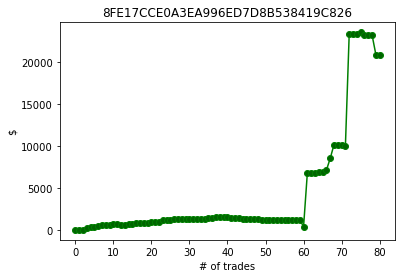

UID: 8FE17CCE0A3EA996ED7D8B538419C826
STD: 7043.541928603819
First recorded trade: 38 days ago
Average profit per trade ($): 258.4014121909877
Max Drawdown 11.350252086599161 %
[2679, 23603, 20924]


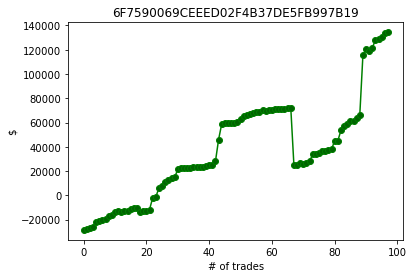

UID: 6F7590069CEEED02F4B37DE5FB997B19
STD: 42038.20835769145
First recorded trade: 10 days ago
Average profit per trade ($): 1371.701779199898
Max Drawdown 65.8883220660003 %
[47659, 72333, 24674]


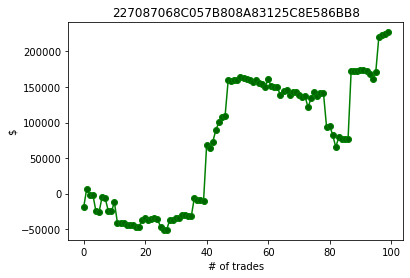

UID: 227087068C057B808A83125C8E586BB8
STD: 89505.70642690269
First recorded trade: 13 days ago
Average profit per trade ($): 2269.794649385901
Max Drawdown 60.10846713994089 %
[98641, 164105, 65464]


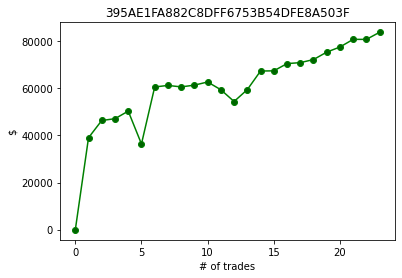

UID: 395AE1FA882C8DFF6753B54DFE8A503F
STD: 18133.893333011627
First recorded trade: 79 days ago
Average profit per trade ($): 3492.5078261804174
Max Drawdown 27.69453938478658 %
[13937, 50324, 36387]


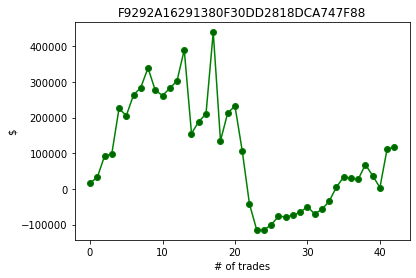

UID: F9292A16291380F30DD2818DCA747F88
STD: 150074.83300154947
First recorded trade: 78 days ago
Average profit per trade ($): 2704.3933784902347
Max Drawdown 126.18107320363615 %
[553704, 438817, -114887]


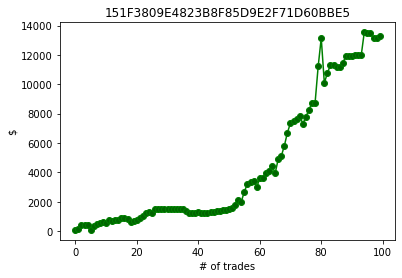

UID: 151F3809E4823B8F85D9E2F71D60BBE5
STD: 4503.133508340542
First recorded trade: 6 days ago
Average profit per trade ($): 132.69745009919998
Max Drawdown 23.15533242050814 %
[3044, 13146, 10102]


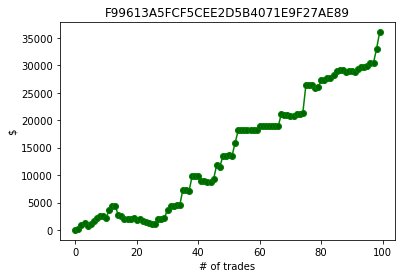

UID: F99613A5FCF5CEE2D5B4071E9F27AE89
STD: 10776.846083557419
First recorded trade: 9 days ago
Average profit per trade ($): 360.1576674621
Max Drawdown 73.76863985539991 %
[3265, 4426, 1161]


In [25]:
query = "select distinct userId from df"
res = sqldf(query)
trader_uids = res['userId'].to_list()


def get_change(current, previous):
    if current == previous:
        return 100.0
    try:
        return (abs(current - previous) / previous) * 100.0
    except ZeroDivisionError:
        return 0


def max_drawdown(lst):
    max_dif = 0
    max_val = 0
    min_val = 0
    global_min = -9999999
    for i in range(len(lst) - 1):
        max_dif = -9999999
        for j in range(i, len(lst)):
            if lst[i] - lst[j] > max_dif:
                max_dif = lst[i] - lst[j]
                if max_dif > global_min:
                    global_min = max_dif
                    max_val = lst[i]
                    min_val = lst[j]
    return [global_min, max_val, min_val]


for trader in trader_uids:
    trade_no = f"Select count(userId) from df where userId = '{trader}'"
    res1 = sqldf(query)

    number_of_trades = len(res1)
    query = f"SELECT pnl from df WHERE userId = '{trader}' and {number_of_trades} > 5 order by date "
    pnl = sqldf(query)
    data = pnl
    if len(data) > 0:
        lst = []
        amount = 0
        for x in data['pnl']:
            amount += int(x)
            lst.append(amount)
        peak_profit = max(lst)
        lowest_profit = min(lst)
        if peak_profit > 500:
            plt.plot(lst, color='green', marker='o', mfc='darkgreen')  #plot the data
            plt.ylabel('$')  #set the label for y axis
            plt.xlabel('# of trades')  #set the label for x-axis
            plt.title(trader)  #set the title of the graph
            plt.show()  #display the graph
            query = f"select createTimeStamp from df WHERE userId = '{trader}'"
            date = sqldf(query)
            first_trade_time = date['createTimeStamp'].to_list()[0]
            started = datetime.now()
            diff = str(started - datetime.fromtimestamp(first_trade_time)).split(',')[0]
            print('UID:', trader)
            print('STD:', statistics.stdev(lst))
            print('First recorded trade:', diff, 'ago')
            print('Average profit per trade ($):', sum(data['pnl']) / len(data['pnl']))
            print('Max Drawdown', get_change(max_drawdown(lst)[2], max_drawdown(lst)[1]), '%')
            print( max_drawdown(lst))